# Thesis: Quantitative Assessment of Alternative Reinsurance for the Catastrophes Risks in Russian Regions
## Oleg Pryanikov BEC204
## Moscow 2024

In [2]:
import csv
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import itertools as it
import numpy.matlib as nm
from sklearn import metrics
import sklearn.model_selection as ms
import sklearn.metrics as metrics
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn 

In [42]:
df = pd.read_excel(io='Data.xlsx',sheet_name='RF', usecols = 'A:DK')
df.head(101)

,region,t_2003,n_2003,b_2003,d_2003,inj_2003,pr_2003,t_2004,n_2004,b_2004,...,b_2021,d_2021,inj_2021,pr_2021,t_2022,n_2022,b_2022,d_2022,inj_2022,pr_2022
0,Республика Бурятия,6,21,1,9,542,0,5,11,1,...,0,0,4758,130.180,3,4,0,5,57,107.663805
1,Республика Саха (Якутия),4,17,0,22,141,0,14,11,0,...,0,0,0,18.150,3,2,0,2,2987,487.845400
2,Забайкальский край,4,25,0,14,962,0,17,2,0,...,2,0,15254,56.318,3,1,0,2,15692,0.003000
3,Камчатский край,5,8,0,22,29,0,10,9,0,...,0,45,187,115.667,2,1,0,5,433,109.620000
4,Приморский край,12,4,0,27,183,0,5,5,0,...,7,0,46,170.425,4,2,0,13,44077,5000.751500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Тамбовская область,1,0,1,1,1,0,3,0,0,...,2,3,12,584.870,1,0,0,1,15,0.000000
81,Тверская область,13,0,0,32,50,0,8,0,0,...,1,3,3,62.227,1,0,0,2,2,0.000000
82,Тульская область,6,0,0,22,103,0,3,0,1,...,1,0,15,0.000,2,1,0,1,14,0.000000
83,Ярославская область,5,0,1,0,20,0,13,0,0,...,3,0,21,8.036,1,0,0,1,11,0.000000


In [26]:
df.describe()

,t_2003,n_2003,b_2003,d_2003,inj_2003,pr_2003,t_2004,n_2004,b_2004,d_2004,...,b_2021,d_2021,inj_2021,pr_2021,t_2022,n_2022,b_2022,d_2022,inj_2022,pr_2022
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.000000,85.000000,85.000000
mean,6.317647,3.364706,0.176471,13.658824,183.894118,0.0,10.294118,2.717647,0.329412,28.929412,...,1.011765,6.223529,584.682353,563.135929,1.929412,0.952941,0.0,2.341176,2767.929412,92.098762
std,7.792261,6.158322,0.467426,19.074137,497.361778,0.0,10.448084,3.682687,0.730105,42.668654,...,1.728570,9.929965,2463.601642,3107.563371,2.885878,1.557668,0.0,4.196237,10289.880161,544.566235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000,2.000000,0.0,3.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,8.000000,37.000000,0.0,8.000000,1.000000,0.000000,19.000000,...,0.000000,2.000000,15.000000,18.150000,1.000000,0.000000,0.0,1.000000,13.000000,0.000000
75%,8.000000,3.000000,0.000000,16.000000,154.000000,0.0,13.000000,4.000000,0.000000,33.000000,...,1.000000,6.000000,50.000000,130.180000,3.000000,2.000000,0.0,3.000000,200.000000,13.071356
max,52.000000,25.000000,2.000000,102.000000,4069.000000,0.0,63.000000,17.000000,4.000000,333.000000,...,7.000000,55.000000,16015.000000,28064.600000,20.000000,9.000000,0.0,25.000000,62902.000000,5000.751500


In [44]:
print(2022, ((df["t_2022"]>0)+(df["n_2022"]>0)).corr(df["pr_2022"]>0))
print(2021, ((df["t_2021"]>0)+(df["n_2021"]>0)).corr(df["pr_2021"]>0))
print(2020, ((df["t_2020"]>0)+(df["n_2020"]>0)).corr(df["pr_2020"]>0))
print(2019, ((df["t_2019"]>0)+(df["n_2019"]>0)).corr(df["pr_2019"]>0))
print(2018, ((df["t_2018"]>0)+(df["n_2018"]>0)).corr(df["pr_2018"]>0))
print(2017, ((df["t_2017"]>0)+(df["n_2017"]>0)).corr(df["pr_2017"]>0))
print(2016, ((df["t_2016"]>0)+(df["n_2016"]>0)).corr(df["pr_2016"]>0))
print(2015, ((df["t_2015"]>0)+(df["n_2015"]>0)).corr(df["pr_2015"]>0))
print(2014, ((df["t_2014"]>0)+(df["n_2014"]>0)).corr(df["pr_2014"]>0))
print(2009, ((df["t_2009"]>0)+(df["n_2009"]>0)).corr(df["pr_2009"]>0))
print(2008, ((df["t_2008"]>0)+(df["n_2008"]>0)).corr(df["pr_2008"]>0))
print(2007, ((df["t_2007"]>0)+(df["n_2007"]>0)).corr(df["pr_2007"]>0))
print(2006, ((df["t_2006"]>0)+(df["n_2006"]>0)).corr(df["pr_2006"]>0))

2022 0.5476598997737362
2021 0.19474054963946688
2020 0.5784790097963377
2019 0.4088728101657472
2018 0.3298619056690152
2017 0.4683884660215713
2016 0.45910956911431083
2015 0.41690959184920634
2014 0.39472816593326887
2009 0.5942392140638333
2008 0.3353353533357122
2007 0.5238227218271834
2006 0.3223595239024317


In [47]:
df = pd.read_excel(io='Data.xlsx',sheet_name='CFD', usecols = 'A:DK')
df.head(101)

,region,t_2003,n_2003,b_2003,d_2003,inj_2003,pr_2003,t_2004,n_2004,b_2004,...,b_2021,d_2021,inj_2021,pr_2021,t_2022,n_2022,b_2022,d_2022,inj_2022,pr_2022
0,Белгородская область,1,1,1,0,69,0,2,0,0,...,1,1,1,282.445,0,0,0,0,0,0.000000
1,Брянская область,1,0,0,5,0,0,6,0,0,...,3,7,7,0.000,9,4,0,1,814,124.203603
2,Владимирская область,6,1,0,19,7,0,7,0,3,...,6,9,37,5.409,1,0,0,0,17,0.000000
3,Воронежская область,3,2,0,7,22,0,6,0,0,...,1,12,50,12.419,3,0,0,5,125,12.780000
4,Ивановская область,6,1,0,11,14,0,11,1,0,...,2,1,10,50.910,0,1,0,0,0,0.000000
5,Калужская область,3,0,0,4,0,0,3,0,0,...,5,5,31,4.317,0,1,0,0,0,0.000000
6,Костромская область,4,0,0,0,1,0,5,1,0,...,7,1,1,438.961,1,9,0,1,5,0.683810
7,Курская область,3,1,0,10,7,0,3,0,0,...,2,0,0,0.540,5,3,0,3,10465,257.601921
8,Липецкая область,0,1,0,0,2,0,8,0,0,...,1,3,9,77.785,1,1,0,0,11,8.167800
9,Московская область,31,3,0,49,416,0,63,0,0,...,0,23,87,0.000,8,0,0,9,78,0.000000


In [48]:
print(2022, ((df["t_2022"]>0)+(df["n_2022"]>0)).corr(df["pr_2022"]>0))
print(2021, ((df["t_2021"]>0)+(df["n_2021"]>0)).corr(df["pr_2021"]>0))
print(2020, ((df["t_2020"]>0)+(df["n_2020"]>0)).corr(df["pr_2020"]>0))
print(2019, ((df["t_2019"]>0)+(df["n_2019"]>0)).corr(df["pr_2019"]>0))
print(2018, ((df["t_2018"]>0)+(df["n_2018"]>0)).corr(df["pr_2018"]>0))
print(2017, ((df["t_2017"]>0)+(df["n_2017"]>0)).corr(df["pr_2017"]>0))
print(2016, ((df["t_2016"]>0)+(df["n_2016"]>0)).corr(df["pr_2016"]>0))
print(2015, ((df["t_2015"]>0)+(df["n_2015"]>0)).corr(df["pr_2015"]>0))
print(2014, ((df["t_2014"]>0)+(df["n_2014"]>0)).corr(df["pr_2014"]>0))
print(2009, ((df["t_2009"]>0)+(df["n_2009"]>0)).corr(df["pr_2009"]>0))
print(2008, ((df["t_2008"]>0)+(df["n_2008"]>0)).corr(df["pr_2008"]>0))
print(2007, ((df["t_2007"]>0)+(df["n_2007"]>0)).corr(df["pr_2007"]>0))
print(2006, ((df["t_2006"]>0)+(df["n_2006"]>0)).corr(df["pr_2006"]>0))

2022 0.31622776601683794
2021 -0.25
2020 0.44320263021395884
2019 0.35675303400633784
2018 -0.3286878675669583
2017 0.4385290096535146
2016 0.35675303400633784
2015 nan
2014 0.1754116038614058
2009 0.6201736729460421
2008 nan
2007 nan
2006 nan


# Distribution visualization

## Catastrophe frequencies 

In [7]:
df = pd.read_excel(io='Data.xlsx',sheet_name='FEFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[35, 47, 47, 33, 21, 20, 16, 22, 21]

In [5]:
FEFD = t_n

In [8]:
df = pd.read_excel(io='Data.xlsx',sheet_name='SibFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[26, 38, 28, 34, 32, 24, 24, 28, 21]

In [9]:
SibFD = t_n

In [12]:
df = pd.read_excel(io='Data.xlsx',sheet_name='UFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[9, 16, 15, 12, 12, 10, 15, 22, 15]

In [13]:
UFD = t_n

In [14]:
df = pd.read_excel(io='Data.xlsx',sheet_name='VFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[34, 73, 51, 53, 45, 39, 63, 47, 36]

In [15]:
VFD = t_n

In [16]:
df = pd.read_excel(io='Data.xlsx',sheet_name='SouthFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[57, 37, 50, 36, 39, 35, 34, 41, 52]

In [17]:
SouthFD = t_n

In [18]:
df = pd.read_excel(io='Data.xlsx',sheet_name='NCFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[15, 23, 21, 20, 27, 35, 30, 19, 17]

In [19]:
NCFD = t_n

In [20]:
df = pd.read_excel(io='Data.xlsx',sheet_name='NWFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[10, 29, 19, 18, 21, 16, 12, 12, 21]

In [21]:
NWFD = t_n

In [22]:
df = pd.read_excel(io='Data.xlsx',sheet_name='CFD', usecols = 'A:DK')

t_n = []
t_n.append(sum(df["t_2022"]+df["n_2022"]))
t_n.append(sum(df["t_2021"]+df["n_2021"]))
t_n.append(sum(df["t_2020"]+df["n_2020"]))
t_n.append(sum(df["t_2019"]+df["n_2019"]))
t_n.append(sum(df["t_2018"]+df["n_2018"]))
t_n.append(sum(df["t_2017"]+df["n_2017"]))
t_n.append(sum(df["t_2016"]+df["n_2016"]))
t_n.append(sum(df["t_2015"]+df["n_2015"]))
t_n.append(sum(df["t_2014"]+df["n_2014"]))

t_n

[59, 42, 40, 45, 37, 39, 38, 33, 48]

In [23]:
CFD = t_n

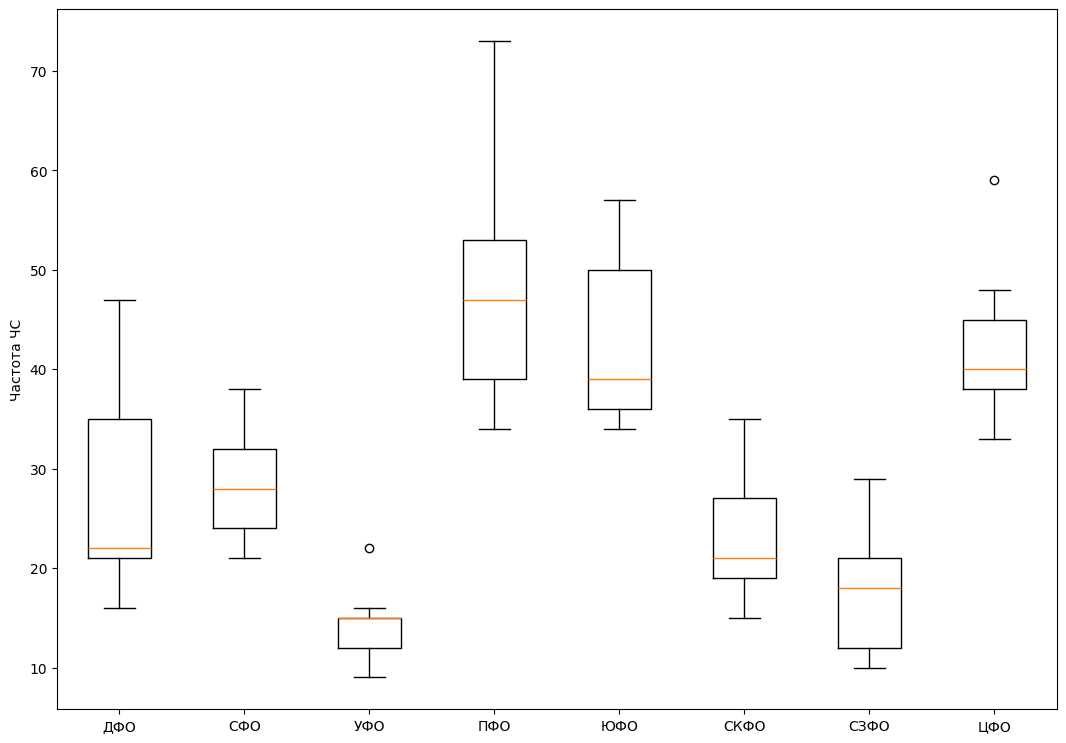

In [34]:
data = [FEFD, SibFD, UFD, VFD, SouthFD, NCFD, NWFD, CFD]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

# x-axis labels
ax.set_xticklabels(['ДФО', 'СФО', 'УФО', 'ПФО', 'ЮФО', 'СКФО', 'СЗФО', 'ЦФО'])

# y-axis labels
plt.ylabel("Частота ЧС")
 
# show plot
plt.show()

## Claim Distribution

In [35]:
df = pd.read_excel(io='Data.xlsx',sheet_name='FEFD', usecols = 'A:DK')

ips = [1.1074, 1.1202, 1.0539, 1.0207, 1.0376, 1.0389, 1.0499, 1.0715, 1.1180]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[6596.143337524,
 884.6812662480002,
 6168.199500027753,
 16484.02488765889,
 7107.47539214087,
 288.06369611511946,
 180.50740605731875,
 2162.508455399012,
 15718.001436639617]

In [36]:
FEFD = pr

In [62]:
df = pd.read_excel(io='Data.xlsx',sheet_name='SibFD', usecols = 'A:DK')

ips = [1.1077, 1.1159, 1.0500, 1.0196, 1.0428, 1.0358, 1.0474, 1.0910, 1.1220]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
#pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[351.40232272200006,
 894.650860026,
 72.62833130986624,
 1511.1939958458847,
 2027.6650331266605,
 2240.168244376898,
 752.9631382512997,
 14490.034538189282]

In [63]:
SibFD = pr

In [39]:
df = pd.read_excel(io='Data.xlsx',sheet_name='UFD', usecols = 'A:DK')

ips = [1.0985, 1.1303, 1.0574, 1.0241, 1.0327, 1.0311, 1.0421, 1.0703, 1.0994]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[366.07370446,
 8757.897997520979,
 300.6535405255533,
 157.20445145252737,
 81.56357765084302,
 1242.9253354747011,
 1971.483620134732,
 243.969303491681,
 159.5173288207622]

In [40]:
UFD = pr

In [68]:
df = pd.read_excel(io='Data.xlsx',sheet_name='VFD', usecols = 'A:DK')

ips = [1.1091, 1.1163, 1.0464, 1.0190, 1.0419, 1.0273, 1.0527, 1.0861, 1.1193]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
#pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[482.65956289878596,
 953.2509659617746,
 7203.081687176696,
 3141.3402936119746,
 2772.624104561352,
 2809.166228477632,
 3977.148051158418,
 2793.833443455107]

In [69]:
VFD = pr

In [44]:
df = pd.read_excel(io='Data.xlsx',sheet_name='SouthFD', usecols = 'A:DK')

ips = [1.1189, 1.1261, 1.0565, 1.0207, 1.0446, 1.0267, 1.0515, 1.0881, 1.1173]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[154.682778988123,
 1013.59158473664,
 5132.7919677552745,
 107.31068185914425,
 3035.626341624712,
 6664.207485308271,
 925.4587272477022,
 4839.461533859962,
 6036.468626779929]

In [45]:
SouthFD = pr

In [46]:
df = pd.read_excel(io='Data.xlsx',sheet_name='NCFD', usecols = 'A:DK')

ips = [1.0956, 1.1465, 1.0519, 1.0215, 1.0369, 1.0322, 1.0606, 1.0975, 1.1162]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[76.81828071222202,
 340.982061207,
 4344.254044145762,
 2809.3820897808864,
 336.9397996013843,
 1176.1027409980381,
 4845.227918088003,
 2104.2721330860977,
 509.0301500462544]

In [47]:
NCFD = pr

In [48]:
df = pd.read_excel(io='Data.xlsx',sheet_name='NWFD', usecols = 'A:DK')

ips = [1.1254, 1.1307, 1.0514, 1.0306, 1.0413, 1.0295, 1.0484, 1.0853, 1.1190]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[14.427948471000002,
 1537.7726954102998,
 2008.8337192537142,
 13.78951503155912,
 54.71852025215881,
 989.5340993595713,
 35.856798222672495,
 0.0,
 170.7563578927872]

In [49]:
NWFD = pr

In [50]:
df = pd.read_excel(io='Data.xlsx',sheet_name='CFD', usecols = 'A:DK')

ips = [1.1199, 1.1368, 1.0585, 1.0318, 1.0465, 1.0301, 1.0470, 1.0832, 1.1246]

pr = []

pr.append(sum(df["pr_2022"])*math.prod(ips[8:]))
pr.append(sum(df["pr_2021"])*math.prod(ips[7:]))
pr.append(sum(df["pr_2020"])*math.prod(ips[6:]))
pr.append(sum(df["pr_2019"])*math.prod(ips[5:]))
pr.append(sum(df["pr_2018"])*math.prod(ips[4:]))
pr.append(sum(df["pr_2017"])*math.prod(ips[3:]))
pr.append(sum(df["pr_2016"])*math.prod(ips[2:]))
pr.append(sum(df["pr_2015"])*math.prod(ips[1:]))
pr.append(sum(df["pr_2014"])*math.prod(ips))
pr

[709.5134396888601,
 1863.45277675168,
 775.287342437349,
 61.977706649162144,
 57.821541997733576,
 537.9906251828603,
 232.2997442321535,
 0.0,
 4067.99813525399]

In [51]:
CFD = pr

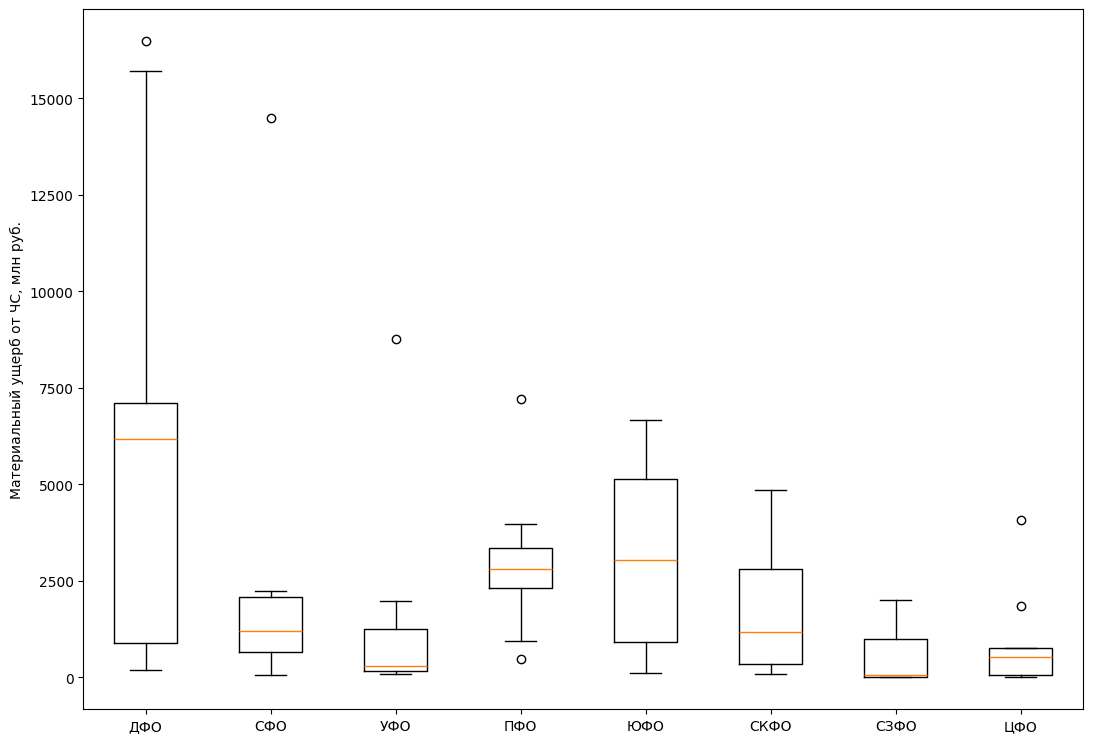

In [70]:
# без учета СФО в 2020 году и ПФО в 2021


data = [FEFD, SibFD, UFD, VFD, SouthFD, NCFD, NWFD, CFD]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

# x-axis labels
ax.set_xticklabels(['ДФО', 'СФО', 'УФО', 'ПФО', 'ЮФО', 'СКФО', 'СЗФО', 'ЦФО'])

# y-axis labels
plt.ylabel("Материальный ущерб от ЧС, млн руб.")
 
# show plot
plt.show()